# Loading dataset

In [165]:
!pip install recommenders

In [166]:
!pip install scikit-surprise

In [167]:
!pip install --upgrade pandera

In [168]:
# Imporitng users

import pandas as pd

u_cols =  ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(r"/content/u.user", sep='|', names=u_cols, encoding='latin-1')

n_users = users.shape[0]
print('Number of users:', n_users)

Number of users: 943


In [169]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [170]:
users.dtypes

,0
user_id,int64
age,int64
sex,object
occupation,object
zip_code,object


In [171]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Step 1: Convert `zip_code` to integer
#users['zip_code'] = users['zip_code'].astype(int)

# Step 2: Encode `sex` and `occupation` using LabelEncoder
label_encoder_sex = LabelEncoder()
label_encoder_occupation = LabelEncoder()

users['sex'] = label_encoder_sex.fit_transform(users['sex'])
users['occupation'] = label_encoder_occupation.fit_transform(users['occupation'])

# Display the transformed DataFrame
print(users)


     user_id  age  sex  occupation zip_code
0          1   24    1          19    85711
1          2   53    0          13    94043
2          3   23    1          20    32067
3          4   24    1          19    43537
4          5   33    0          13    15213
..       ...  ...  ...         ...      ...
938      939   26    0          18    33319
939      940   32    1           0    02215
940      941   20    1          18    97229
941      942   48    0          10    78209
942      943   22    1          18    77841

[943 rows x 5 columns]


In [172]:
# Importing ratings
ratings = pd.read_csv(r"/content/u.data.data",
                      sep = '\t',names= ['user_id', 'movie_id', 'rating', 'Timestamp' ])
print(ratings.shape)
ratings.head()


(100000, 4)


,user_id,movie_id,rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


# Data pre-processing

In [173]:

#Changing timestamp to date time
from datetime import datetime
ratings['timestamp'] = ratings['Timestamp'].apply(lambda x: datetime.fromtimestamp(x))
ratings.drop('Timestamp', axis=1, inplace=True)
#ratings.drop('date', axis=1, inplace=True)
# Function to extract year, month, day, hour, minute, second, and day of the week
def extract_datetime_info(ts):
    dt = pd.to_datetime(ts, unit='s')
    return dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, dt.day_name()

# Apply the function to the 'Timestamp' column
ratings[['year', 'month', 'day', 'hour', 'minute', 'second', 'day_of_week']] = ratings['timestamp'].apply(extract_datetime_info).tolist()

# Display the DataFrame with the new columns
ratings.head()

,user_id,movie_id,rating,timestamp,year,month,day,hour,minute,second,day_of_week
0,196,242,3,1997-12-04 15:55:49,1997,12,4,15,55,49,Thursday
1,186,302,3,1998-04-04 19:22:22,1998,4,4,19,22,22,Saturday
2,22,377,1,1997-11-07 07:18:36,1997,11,7,7,18,36,Friday
3,244,51,2,1997-11-27 05:02:03,1997,11,27,5,2,3,Thursday
4,166,346,1,1998-02-02 05:33:16,1998,2,2,5,33,16,Monday


In [174]:
# Importing movies
col_n = ['movie_id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']


movies = pd.read_csv(r"/content/u.item.item",
                       sep = '|',encoding = 'latin-1',names=col_n )

movies=movies.drop('video release date', axis=1)
movies = movies.dropna()
print(movies.shape)

movies.head()

(1679, 23)


,movie_id,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [175]:
# Convert 'release date' to datetime format with the correct format string
movies['release date'] = pd.to_datetime(movies['release date'], format='%d-%b-%Y')

# Extract year, month, day, and day of the month
movies['year'] = movies['release date'].dt.year.astype(int)
movies['month'] = movies['release date'].dt.month.astype(int)
movies['day_of_month'] = movies['release date'].dt.day.astype(int)
movies['day_of_week'] = movies['release date'].dt.day_name()

# Display the DataFrame with new columns
movies.head()


,movie_id,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,month,day_of_month,day_of_week
0,1,Toy Story (1995),1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,1995,1,1,Sunday
1,2,GoldenEye (1995),1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,1,0,0,1995,1,1,Sunday
2,3,Four Rooms (1995),1995-01-01,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,1,0,0,1995,1,1,Sunday
3,4,Get Shorty (1995),1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,1995,1,1,Sunday
4,5,Copycat (1995),1995-01-01,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,1,0,0,1995,1,1,Sunday


In [176]:
# Merging users and ratings
rating_user_merged = ratings.merge(users, on='user_id', how='left')
rating_user_merged

,user_id,movie_id,rating,timestamp,year,month,day,hour,minute,second,day_of_week,age,sex,occupation,zip_code
0,196,242,3,1997-12-04 15:55:49,1997,12,4,15,55,49,Thursday,49,1,20,55105
1,186,302,3,1998-04-04 19:22:22,1998,4,4,19,22,22,Saturday,39,0,6,00000
2,22,377,1,1997-11-07 07:18:36,1997,11,7,7,18,36,Friday,25,1,20,40206
3,244,51,2,1997-11-27 05:02:03,1997,11,27,5,2,3,Thursday,28,1,19,80525
4,166,346,1,1998-02-02 05:33:16,1998,2,2,5,33,16,Monday,47,1,3,55113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,1997-11-22 05:10:44,1997,11,22,5,10,44,Saturday,13,1,18,83702
99996,716,204,5,1997-11-17 19:39:03,1997,11,17,19,39,3,Monday,36,0,0,44265
99997,276,1090,1,1997-09-20 22:49:55,1997,9,20,22,49,55,Saturday,21,1,18,95064
99998,13,225,2,1997-12-17 22:52:36,1997,12,17,22,52,36,Wednesday,47,1,3,29206


# Baseline models

## MF- SVD

In [177]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from scipy.sparse.linalg import svds
from sklearn.model_selection import train_test_split

np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)

# Assuming you have the ratings dataset loaded as `ratings`
# Example of how you might load it:
# ratings = pd.read_csv('path_to_ratings.csv')

# Split the dataset into training and test sets
ratings_train, ratings_test = train_test_split(ratings, test_size=0.20, random_state=42)

# Number of users and items
num_users = max(ratings_train['user_id'].max(), ratings_test['user_id'].max())
num_items = max(ratings_train['movie_id'].max(), ratings_test['movie_id'].max())

# Create user-item interaction matrices for training and testing data
interaction_matrix_train = csr_matrix(
    (ratings_train['rating'], (ratings_train['user_id'] - 1, ratings_train['movie_id'] - 1)),
    shape=(num_users, num_items)
).toarray()

interaction_matrix_test = csr_matrix(
    (ratings_test['rating'], (ratings_test['user_id'] - 1, ratings_test['movie_id'] - 1)),
    shape=(num_users, num_items)
).toarray()


class SVDWithEvaluation:
    def __init__(self, num_factors=10):
        self.num_factors = num_factors

    def fit(self, interaction_matrix):
        self.user_ratings_mean = np.mean(interaction_matrix, axis=1)
        self.interaction_matrix_demeaned = interaction_matrix - self.user_ratings_mean.reshape(-1, 1)
        self.U, self.sigma, self.Vt = svds(self.interaction_matrix_demeaned, k=self.num_factors)
        self.sigma = np.diag(self.sigma)

    def predict(self):
        all_user_predicted_ratings = np.dot(np.dot(self.U, self.sigma), self.Vt) + self.user_ratings_mean.reshape(-1, 1)
        return all_user_predicted_ratings

    def evaluate(self, test_data, top_n=5):
        predicted_ratings = self.predict()
        predicted_ratings = predicted_ratings[test_data['user_id'] - 1, test_data['movie_id'] - 1]
        actual_ratings = test_data['rating']

        rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
        mse = mean_squared_error(actual_ratings, predicted_ratings)
        mae = mean_absolute_error(actual_ratings, predicted_ratings)

        # Convert predicted ratings to binary values (1: recommended, 0: not recommended)
        binary_predicted_ratings = (predicted_ratings >= 3.5).astype(int)

        # Accuracy
        accuracy = accuracy_score(actual_ratings >= 3.5, binary_predicted_ratings)

        # Precision, Recall, F1 Score
        precision = precision_score(actual_ratings >= 3.5, binary_predicted_ratings)
        recall = recall_score(actual_ratings >= 3.5, binary_predicted_ratings)
        f1 = f1_score(actual_ratings >= 3.5, binary_predicted_ratings)

        return rmse, mse, mae, accuracy, precision, recall, f1

    def recommend(self, user_id, top_n=5):
        user_predictions = self.predict()[user_id]
        top_items = np.argsort(user_predictions)[-top_n:][::-1]
        return top_items


# Train the SVD model
svd_with_eval = SVDWithEvaluation(num_factors=10)
svd_with_eval.fit(interaction_matrix_train)

# Evaluate the SVD model
rmse, mse, mae, accuracy, precision, recall, f1 = svd_with_eval.evaluate(ratings_test, top_n=5)

# Print Evaluation Metrics
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


RMSE: 2.6089568915361694
MSE: 6.8066560618940715
MAE: 2.342252425806567
Accuracy: 0.46795
Precision: 0.8736616702355461
Recall: 0.03712465878070974
F1 Score: 0.071222833202409


## BPR

In [178]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split
from recommenders.datasets.python_splitters import python_random_split
from recommenders.utils.timer import Timer
from recommenders.utils.constants import SEED


np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)
# Constants
NUM_FACTORS = 10  # Number of latent factors for SVD
NUM_EPOCHS = 10  # Number of epochs for SVD

print(f"System version: {sys.version}")

# Load the dataset
file_path = '/content/u.data.data'
column_names = ['userID', 'itemID', 'rating', 'timestamp']
data = pd.read_csv(file_path, sep='\t', names=column_names)

# Drop the timestamp column as it is not needed
data.drop(columns=['timestamp'], inplace=True)

# Ensure the column names are correct
print(data.columns)
print(data.head())

# Split the data into training and testing sets
train, test = python_random_split(data, 0.80, seed=SEED)

# Prepare data for Surprise
reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(data[['userID', 'itemID', 'rating']], reader)

# Split the data into training and testing sets for Surprise
trainset_surprise, testset_surprise = train_test_split(data_surprise, test_size=0.20, random_state=42)

# Initialize and train the SVD model
algo = SVD(n_factors=NUM_FACTORS, n_epochs=NUM_EPOCHS, lr_all=0.005, reg_all=0.02)
with Timer() as t:
    algo.fit(trainset_surprise)
print(f"Took {t.interval:.2f} seconds for training.")

# Make predictions on the test set
predictions = algo.test(testset_surprise)

# Evaluate RMSE, MSE, and MAE
rmse = accuracy.rmse(predictions)
mse = accuracy.mse(predictions)
mae = accuracy.mae(predictions)

# Compute additional metrics
def accuracy_metrics(predictions):
    y_true = np.array([pred.r_ui for pred in predictions])
    y_pred = np.array([pred.est for pred in predictions])

    accuracy_score = np.mean(np.round(y_true) == np.round(y_pred))
    precision = np.mean([1 if round(pred.r_ui) == round(pred.est) else 0 for pred in predictions])
    recall = np.mean([1 if round(pred.r_ui) == round(pred.est) else 0 for pred in predictions])
    f1 = 2 * (precision * recall) / (precision + recall + 1e-10)

    return accuracy_score, precision, recall, f1

accuracy_score, precision, recall, f1 = accuracy_metrics(predictions)
print(f"Accuracy: {accuracy_score:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Save all metrics to CSV
all_metrics = {
    'RMSE': rmse,
    'MSE': mse,
    'MAE': mae,
    'Accuracy': accuracy_score,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

all_metrics_df = pd.DataFrame(list(all_metrics.items()), columns=['Metric', 'Score'])




System version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Index(['userID', 'itemID', 'rating'], dtype='object')
   userID  itemID  rating
0     196     242       3
1     186     302       3
2      22     377       1
3     244      51       2
4     166     346       1
Took 0.76 seconds for training.
RMSE: 0.9448
MSE: 0.8926
MAE:  0.7482
Accuracy: 0.41
Precision: 0.41
Recall: 0.41
F1 Score: 0.41


## NCF

In [179]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)
# Load the dataset
file_path = "/content/u.data.data"
columns = ["userID", "itemID", "rating", "timestamp"]
data = pd.read_csv(file_path, sep="\t", names=columns)

# Drop timestamp and use only userID, itemID, and ratings
data = data[["userID", "itemID", "rating"]]

# Map user and item IDs to sequential indices
user_mapping = {user: idx for idx, user in enumerate(data["userID"].unique())}
item_mapping = {item: idx for idx, item in enumerate(data["itemID"].unique())}

data["userID"] = data["userID"].map(user_mapping)
data["itemID"] = data["itemID"].map(item_mapping)

# Binarize ratings: Convert to implicit feedback (1 for rating >= 4, otherwise 0)
data["rating"] = (data["rating"] >= 4).astype(int)

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Generate negative samples
def generate_negative_samples(data, num_users, num_items, num_neg=4):
    users, items, labels = [], [], []
    user_item_set = set(zip(data["userID"], data["itemID"]))

    for _, row in data.iterrows():
        # Positive sample
        users.append(row["userID"])
        items.append(row["itemID"])
        labels.append(row["rating"])

        # Generate negative samples
        for _ in range(num_neg):
            neg_item = np.random.randint(0, num_items)
            while (row["userID"], neg_item) in user_item_set:
                neg_item = np.random.randint(0, num_items)
            users.append(row["userID"])
            items.append(neg_item)
            labels.append(0)  # Negative label

    return np.array(users), np.array(items), np.array(labels)

num_users = len(user_mapping)
num_items = len(item_mapping)

train_users, train_items, train_labels = generate_negative_samples(train_data, num_users, num_items)
test_users, test_items, test_labels = test_data["userID"].values, test_data["itemID"].values, test_data["rating"].values

# Define the Neural Collaborative Filtering (NCF) model
embedding_dim = 32

# User and item embeddings
user_input = tf.keras.layers.Input(shape=(1,))
item_input = tf.keras.layers.Input(shape=(1,))

user_embedding = tf.keras.layers.Embedding(input_dim=num_users, output_dim=embedding_dim)(user_input)
item_embedding = tf.keras.layers.Embedding(input_dim=num_items, output_dim=embedding_dim)(item_input)

# Flatten embeddings
user_vector = tf.keras.layers.Flatten()(user_embedding)
item_vector = tf.keras.layers.Flatten()(item_embedding)

# Concatenate user and item embeddings
concat_vector = tf.keras.layers.Concatenate()([user_vector, item_vector])

# Hidden layers
dense_1 = tf.keras.layers.Dense(128, activation="relu")(concat_vector)
dropout_1 = tf.keras.layers.Dropout(0.2)(dense_1)

dense_2 = tf.keras.layers.Dense(64, activation="relu")(dropout_1)
dropout_2 = tf.keras.layers.Dropout(0.2)(dense_2)

output = tf.keras.layers.Dense(1, activation="sigmoid")(dropout_2)

# Compile the model
model = tf.keras.models.Model(inputs=[user_input, item_input], outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Print model summary
model.summary()

# Train the model
batch_size = 256
epochs = 10

history = model.fit(
    [train_users, train_items],
    train_labels,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
)


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_19            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_8 (Embedding)   │ (None, 1, 32)          │         30,176 │ input_layer_18[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_9 (Embedding)   │ (None, 1, 32)          │         53,824 │ input_layer_19[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_18 (Flatten)      │ (None, 32)             │              0 │ embedding_8[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_19 (Flatten)      │ (None, 32)             │              0 │ embedding_9[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 64)             │              0 │ flatten_18[0][0],      │
│ (Concatenate)             │                        │                │ flatten_19[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_32 (Dense)          │ (None, 128)            │          8,320 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 128)            │              0 │ dense_32[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_33 (Dense)          │ (None, 64)             │          8,256 │ dropout_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 64)             │              0 │ dense_33[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_34 (Dense)          │ (None, 1)              │             65 │ dropout_9[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 100,641 (393.13 KB)

 Trainable params: 100,641 (393.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8894 - loss: 0.3129 - val_accuracy: 0.8946 - val_loss: 0.2509
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8951 - loss: 0.2521 - val_accuracy: 0.8949 - val_loss: 0.2500
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8966 - loss: 0.2471 - val_accuracy: 0.8951 - val_loss: 0.2499
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8982 - loss: 0.2397 - val_accuracy: 0.8972 - val_loss: 0.2444
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9017 - loss: 0.2292 - val_accuracy: 0.8985 - val_loss: 0.2418
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9045 - loss: 0.2215 - val_accuracy: 0.8997 - val_loss: 0.2396
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9084 - loss: 0.2133 - val_accuracy: 0.9002 - val_loss: 0.2363
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9112 - loss: 0.2052 -

In [180]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
np.random.seed(42)
# Predictions for the test set
predictions = model.predict([test_users, test_items])

# Convert predictions to binary labels (threshold = 0.5)
predicted_labels = (predictions > 0.5).astype(int)

# Calculate metrics
# RMSE
rmse = np.sqrt(mean_squared_error(test_labels, predictions))
# MSE
mse = mean_squared_error(test_labels, predictions)
# MAE
mae = mean_absolute_error(test_labels, predictions)

# Accuracy, Precision, Recall, F1 Score (binary labels)
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)
f1 = f1_score(test_labels, predicted_labels)

# Print the metrics
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE: 0.5219
MSE: 0.2724
MAE: 0.4160
Accuracy: 0.6005
Precision: 0.8045
Recall: 0.3606
F1 Score: 0.4980


## Factorization Machine

In [181]:
!pip install torchfm

In [182]:
 import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torchfm.model.ffm import FieldAwareFactorizationMachineModel
from sklearn.metrics import mean_squared_error
import numpy as np

In [183]:
df= ratings

In [184]:
# Initialize label encoders for user IDs and movie IDs
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

# Fit and transform user IDs and movie IDs
df['user'] = user_encoder.fit_transform(df['user_id'])
df['movie'] = movie_encoder.fit_transform(df['movie_id'])

# Get the number of unique users and movies
num_users = len(user_encoder.classes_)
num_movies = len(movie_encoder.classes_)

# Prepare feature matrices
X = df[['user', 'movie']].values
y = df['rating'].values

print(f'Number of users: {num_users}')
print(f'Number of movies: {num_movies}')



Number of users: 943
Number of movies: 1682


In [185]:
import torch
import torch.nn as nn
import torch.optim as optim
np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)
class FactorizationMachine(nn.Module):
    def __init__(self, num_users, num_movies, k=5):
        super(FactorizationMachine, self).__init__()
        self.num_users = num_users
        self.num_movies = num_movies
        self.k = k  # Number of latent factors

        self.user_embedding = nn.Embedding(num_users, k)
        self.movie_embedding = nn.Embedding(num_movies, k)

        # Linear layer takes 2*k input features (concatenated user and movie embeddings)
        self.linear = nn.Linear(2 * k, 1, bias=True)
        self.bias = nn.Parameter(torch.tensor(0.0))

    def forward(self, X):
        user_indices = X[:, 0]
        movie_indices = X[:, 1]

        user_embeds = self.user_embedding(user_indices)
        movie_embeds = self.movie_embedding(movie_indices)

        # Concatenate user and movie embeddings
        combined_embeds = torch.cat([user_embeds, movie_embeds], dim=1)

        # Compute linear terms
        linear_terms = self.linear(combined_embeds)

        # Compute interaction terms
        interaction_terms = 0.5 * torch.sum(
            (user_embeds ** 2 + movie_embeds ** 2) - 2 * user_embeds * movie_embeds,
            dim=1, keepdim=True
        )

        preds = linear_terms + self.bias + interaction_terms
        return preds.squeeze()


In [186]:
# Import libraries
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)
# Preprocess the data
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

df['user'] = user_encoder.fit_transform(df['user_id'])
df['movie'] = movie_encoder.fit_transform(df['movie_id'])

num_users = len(user_encoder.classes_)
num_movies = len(movie_encoder.classes_)

# Prepare feature matrices
X = df[['user', 'movie']].values
y = df['rating'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the Factorization Machine model
class FactorizationMachine(nn.Module):
    def __init__(self, num_users, num_movies, k=5):
        super(FactorizationMachine, self).__init__()
        self.num_users = num_users
        self.num_movies = num_movies
        self.k = k  # Number of latent factors

        self.user_embedding = nn.Embedding(num_users, k)
        self.movie_embedding = nn.Embedding(num_movies, k)

        # Linear layer takes 2*k input features (concatenated user and movie embeddings)
        self.linear = nn.Linear(2 * k, 1, bias=True)
        self.bias = nn.Parameter(torch.tensor(0.0))

    def forward(self, X):
        user_indices = X[:, 0]
        movie_indices = X[:, 1]

        user_embeds = self.user_embedding(user_indices)
        movie_embeds = self.movie_embedding(movie_indices)

        # Concatenate user and movie embeddings
        combined_embeds = torch.cat([user_embeds, movie_embeds], dim=1)

        # Compute linear terms
        linear_terms = self.linear(combined_embeds)

        # Compute interaction terms
        interaction_terms = 0.5 * torch.sum(
            (user_embeds ** 2 + movie_embeds ** 2) - 2 * user_embeds * movie_embeds,
            dim=1, keepdim=True
        )

        preds = linear_terms + self.bias + interaction_terms
        return preds.squeeze()

# Instantiate the model, loss function, and optimizer
model = FactorizationMachine(num_users, num_movies, k=5)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.4f}')

# Example prediction for a new user-item pair
user_id = 1  # Example user ID
movie_id = 2  # Example movie ID
user_index = user_encoder.transform([user_id])[0]
movie_index = movie_encoder.transform([movie_id])[0]
pred = model(torch.tensor([[user_index, movie_index]], dtype=torch.long))
print(f'Predicted rating for user {user_id} and movie {movie_id}: {pred.item():.2f}')


Epoch [5/20], Loss: 12.0345
Epoch [10/20], Loss: 9.9481
Epoch [15/20], Loss: 8.4591
Epoch [20/20], Loss: 7.4031
Root Mean Squared Error: 2.7643
Predicted rating for user 1 and movie 2: 7.71


In [187]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from collections import defaultdict

# Load the ratings dataset
#df = pd.read_csv('ratings.csv')
np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)
# Preprocess the data
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

df['user'] = user_encoder.fit_transform(df['user_id'])
df['movie'] = movie_encoder.fit_transform(df['movie_id'])

num_users = len(user_encoder.classes_)
num_movies = len(movie_encoder.classes_)

# Prepare feature matrices
X = df[['user', 'movie']].values
y = df['rating'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the Factorization Machine model
class FactorizationMachine(nn.Module):
    def __init__(self, num_users, num_movies, k=5):
        super(FactorizationMachine, self).__init__()
        self.num_users = num_users
        self.num_movies = num_movies
        self.k = k  # Number of latent factors

        self.user_embedding = nn.Embedding(num_users, k)
        self.movie_embedding = nn.Embedding(num_movies, k)

        self.linear = nn.Linear(2 * k, 1, bias=True)
        self.bias = nn.Parameter(torch.tensor(0.0))

    def forward(self, X):
        user_indices = X[:, 0]
        movie_indices = X[:, 1]

        user_embeds = self.user_embedding(user_indices)
        movie_embeds = self.movie_embedding(movie_indices)

        combined_embeds = torch.cat([user_embeds, movie_embeds], dim=1)
        linear_terms = self.linear(combined_embeds)
        interaction_terms = 0.5 * torch.sum(
            (user_embeds ** 2 + movie_embeds ** 2) - 2 * user_embeds * movie_embeds,
            dim=1, keepdim=True
        )

        preds = linear_terms + self.bias + interaction_terms
        return preds.squeeze()

# Instantiate the model, loss function, and optimizer
model = FactorizationMachine(num_users, num_movies, k=5)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()

# Compute RMSE, MSE, MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Convert ratings to binary recommendations
threshold = 3.5
y_pred_binary = (y_pred >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')



Epoch [5/20], Loss: 12.0345
Epoch [10/20], Loss: 9.9481
Epoch [15/20], Loss: 8.4591
Epoch [20/20], Loss: 7.4031
Root Mean Squared Error (RMSE): 2.7643
Mean Squared Error (MSE): 7.6416
Mean Absolute Error (MAE): 2.1203
Accuracy: 0.5020
Precision: 0.5595
Recall: 0.4409
F1 Score: 0.4932


## Convo MF

In [188]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from collections import defaultdict

# Load the ratings dataset
#df = pd.read_csv('ratings.csv')
np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)
# Preprocess the data
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

df['user'] = user_encoder.fit_transform(df['user_id'])
df['movie'] = movie_encoder.fit_transform(df['movie_id'])

num_users = len(user_encoder.classes_)
num_movies = len(movie_encoder.classes_)

# Prepare feature matrices
X = df[['user', 'movie']].values
y = df['rating'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the ConvMF model
class ConvMF(nn.Module):
    def __init__(self, num_users, num_movies, embed_dim=10, conv_out_channels=16, kernel_size=3):
        super(ConvMF, self).__init__()
        self.num_users = num_users
        self.num_movies = num_movies

        # Embeddings for users and movies
        self.user_embedding = nn.Embedding(num_users, embed_dim)
        self.movie_embedding = nn.Embedding(num_movies, embed_dim)

        # Convolutional layer
        self.conv = nn.Conv1d(in_channels=2*embed_dim, out_channels=conv_out_channels, kernel_size=kernel_size, padding=kernel_size//2)

        # Fully connected layer
        self.fc = nn.Linear(conv_out_channels, 1)

    def forward(self, X):
        user_indices = X[:, 0]
        movie_indices = X[:, 1]

        user_embeds = self.user_embedding(user_indices)
        movie_embeds = self.movie_embedding(movie_indices)

        combined_embeds = torch.cat([user_embeds, movie_embeds], dim=1)
        combined_embeds = combined_embeds.unsqueeze(2)  # Add channel dimension for Conv1D

        conv_out = self.conv(combined_embeds)
        conv_out = conv_out.view(conv_out.size(0), -1)  # Flatten

        preds = self.fc(conv_out).squeeze()
        return preds

# Instantiate the model, loss function, and optimizer
model = ConvMF(num_users, num_movies, embed_dim=10, conv_out_channels=16, kernel_size=3)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()

# Compute RMSE, MSE, MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Convert ratings to binary recommendations
threshold = 3.5
y_pred_binary = (y_pred >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Epoch [5/20], Loss: 13.9312
Epoch [10/20], Loss: 11.2652
Epoch [15/20], Loss: 8.0841
Epoch [20/20], Loss: 6.1141
Root Mean Squared Error (RMSE): 2.3920
Mean Squared Error (MSE): 5.7217
Mean Absolute Error (MAE): 1.9093
Accuracy: 0.4909
Precision: 0.5655
Recall: 0.3176
F1 Score: 0.4067


# Proposed model

In [189]:
# Imporitng users

import pandas as pd

u_cols =  ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(r"/content/u.user", sep='|', names=u_cols, encoding='latin-1')

n_users = users.shape[0]
print('Number of users:', n_users)
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Step 1: Convert `zip_code` to integer
#users['zip_code'] = users['zip_code'].astype(int)

# Step 2: Encode `sex` and `occupation` using LabelEncoder
label_encoder_sex = LabelEncoder()
label_encoder_occupation = LabelEncoder()

users['sex'] = label_encoder_sex.fit_transform(users['sex'])
users['occupation'] = label_encoder_occupation.fit_transform(users['occupation'])

# Display the transformed DataFrame
print(users)


Number of users: 943
     user_id  age  sex  occupation zip_code
0          1   24    1          19    85711
1          2   53    0          13    94043
2          3   23    1          20    32067
3          4   24    1          19    43537
4          5   33    0          13    15213
..       ...  ...  ...         ...      ...
938      939   26    0          18    33319
939      940   32    1           0    02215
940      941   20    1          18    97229
941      942   48    0          10    78209
942      943   22    1          18    77841

[943 rows x 5 columns]


In [190]:
# Importing ratings
ratings = pd.read_csv(r"/content/u.data.data",
                      sep = '\t',names= ['user_id', 'movie_id', 'rating', 'Timestamp' ])
print(ratings.shape)
ratings.head()

#Changing timestamp to date time
from datetime import datetime
ratings['timestamp'] = ratings['Timestamp'].apply(lambda x: datetime.fromtimestamp(x))
ratings.drop('Timestamp', axis=1, inplace=True)
#ratings.drop('date', axis=1, inplace=True)
# Function to extract year, month, day, hour, minute, second, and day of the week
def extract_datetime_info(ts):
    dt = pd.to_datetime(ts, unit='s')
    return dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, dt.day_name()

# Apply the function to the 'Timestamp' column
ratings[['year', 'month', 'day', 'hour', 'minute', 'second', 'day_of_week']] = ratings['timestamp'].apply(extract_datetime_info).tolist()

# Display the DataFrame with the new columns
ratings.head()

(100000, 4)


,user_id,movie_id,rating,timestamp,year,month,day,hour,minute,second,day_of_week
0,196,242,3,1997-12-04 15:55:49,1997,12,4,15,55,49,Thursday
1,186,302,3,1998-04-04 19:22:22,1998,4,4,19,22,22,Saturday
2,22,377,1,1997-11-07 07:18:36,1997,11,7,7,18,36,Friday
3,244,51,2,1997-11-27 05:02:03,1997,11,27,5,2,3,Thursday
4,166,346,1,1998-02-02 05:33:16,1998,2,2,5,33,16,Monday


In [191]:
# Importing movies
col_n = ['movie_id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']


movies = pd.read_csv(r"/content/u.item.item",
                       sep = '|',encoding = 'latin-1',names=col_n )

movies=movies.drop('video release date', axis=1)
movies = movies.dropna()
print(movies.shape)

movies.head()

# Convert 'release date' to datetime format with the correct format string
movies['release date'] = pd.to_datetime(movies['release date'], format='%d-%b-%Y')

# Extract year, month, day, and day of the month
movies['year'] = movies['release date'].dt.year.astype(int)
movies['month'] = movies['release date'].dt.month.astype(int)
movies['day_of_month'] = movies['release date'].dt.day.astype(int)
movies['day_of_week'] = movies['release date'].dt.day_name()

# Display the DataFrame with new columns
movies.head()


(1679, 23)


,movie_id,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,month,day_of_month,day_of_week
0,1,Toy Story (1995),1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,1995,1,1,Sunday
1,2,GoldenEye (1995),1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,1,0,0,1995,1,1,Sunday
2,3,Four Rooms (1995),1995-01-01,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,1,0,0,1995,1,1,Sunday
3,4,Get Shorty (1995),1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,1995,1,1,Sunday
4,5,Copycat (1995),1995-01-01,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,1,0,0,1995,1,1,Sunday


In [192]:
merged_df = pd.merge(pd.merge(ratings, users, on='user_id'), movies, on='movie_id')
merged_df

,user_id,movie_id,rating,timestamp,year_x,month_x,day,hour,minute,second,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,year_y,month_y,day_of_month,day_of_week_y
0,196,242,3,1997-12-04 15:55:49,1997,12,4,15,55,49,...,0,0,0,0,0,0,1997,1,24,Friday
1,186,302,3,1998-04-04 19:22:22,1998,4,4,19,22,22,...,1,0,0,1,0,0,1997,1,1,Wednesday
2,22,377,1,1997-11-07 07:18:36,1997,11,7,7,18,36,...,0,0,0,0,0,0,1994,1,1,Saturday
3,244,51,2,1997-11-27 05:02:03,1997,11,27,5,2,3,...,0,1,0,0,1,1,1994,1,1,Saturday
4,166,346,1,1998-02-02 05:33:16,1998,2,2,5,33,16,...,0,0,0,0,0,0,1997,1,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99982,880,476,3,1997-11-22 05:10:44,1997,11,22,5,10,44,...,0,0,0,0,0,0,1996,9,14,Saturday
99983,716,204,5,1997-11-17 19:39:03,1997,11,17,19,39,3,...,0,0,1,0,0,0,1985,1,1,Tuesday
99984,276,1090,1,1997-09-20 22:49:55,1997,9,20,22,49,55,...,0,0,0,1,0,0,1993,1,1,Friday
99985,13,225,2,1997-12-17 22:52:36,1997,12,17,22,52,36,...,0,0,0,0,0,0,1996,11,27,Wednesday


In [193]:
# Sample 385 random users
sampled_users = merged_df['user_id'].sample(n=385, random_state=1)
sampled_df = merged_df[merged_df['user_id'].isin(sampled_users)]


## Clustering - kmeans (demography and genre)

Demographic Clustering: Number of Clusters = 2, Silhouette Score = 0.41262744480697694
Demographic Clustering: Number of Clusters = 3, Silhouette Score = 0.4876262050287809
Demographic Clustering: Number of Clusters = 4, Silhouette Score = 0.4760130638469418
Demographic Clustering: Number of Clusters = 5, Silhouette Score = 0.4887815581308982
Demographic Clustering: Number of Clusters = 6, Silhouette Score = 0.49434869150693383
Demographic Clustering: Number of Clusters = 7, Silhouette Score = 0.4502003503462672
Demographic Clustering: Number of Clusters = 8, Silhouette Score = 0.5234172502721707
Demographic Clustering: Number of Clusters = 9, Silhouette Score = 0.5444364284730906
Demographic Clustering: Number of Clusters = 10, Silhouette Score = 0.5002958664619022
Demographic Clustering: Number of Clusters = 11, Silhouette Score = 0.4933819867522376
Demographic Clustering: Number of Clusters = 12, Silhouette Score = 0.4999272325318772
Demographic Clustering: Number of Clusters = 13, 

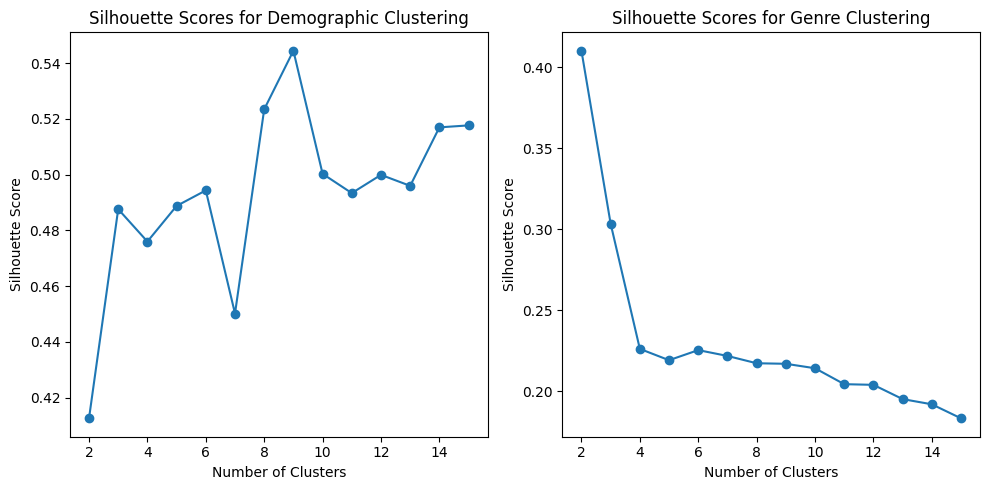

In [194]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Sample dataset (replace this with your actual dataset)
# sampled_df = pd.read_csv('path_to_your_sampled_df.csv')
np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)
# Define genre columns
genre_columns = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Extract genre features
genre_features = sampled_df[genre_columns]

# Process demographic features
demographics = sampled_df[['age', 'sex', 'occupation']]
demographics = pd.get_dummies(demographics)  # One-hot encode categorical variables

# Standardize demographic features
scaler_demo = StandardScaler()
demographics_scaled = scaler_demo.fit_transform(demographics)

# Function to compute genre vectors for each user
def create_genre_vector(user_data):
    return user_data[genre_columns].sum(axis=0).values

# Aggregate genre features per user
def create_user_vectors(df):
    user_vectors = []
    for user_id in df['user_id'].unique():
        user_data = df[df['user_id'] == user_id]
        genre_vector = create_genre_vector(user_data)
        user_vectors.append(genre_vector)
    return np.array(user_vectors)

user_vectors = create_user_vectors(sampled_df)

# Standardize genre vectors
scaler_genre = StandardScaler()
user_vectors_scaled = scaler_genre.fit_transform(user_vectors)

# Function to perform iterative clustering and return silhouette scores
def perform_iterative_clustering(min_clusters, max_clusters, data, cluster_type="Demographic"):
    silhouette_scores = []
    cluster_range = range(min_clusters, max_clusters + 1)

    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(data)
        score = silhouette_score(data, clusters)
        silhouette_scores.append(score)
        print(f"{cluster_type} Clustering: Number of Clusters = {n_clusters}, Silhouette Score = {score}")

    return silhouette_scores, cluster_range

# Iterative clustering for demographic features
min_clusters_demo = 2
max_clusters_demo = 15
silhouette_scores_demo, demo_cluster_range = perform_iterative_clustering(
    min_clusters_demo, max_clusters_demo, demographics_scaled, cluster_type="Demographic"
)

# Iterative clustering for genre features
min_clusters_genre = 2
max_clusters_genre = 15
silhouette_scores_genre, genre_cluster_range = perform_iterative_clustering(
    min_clusters_genre, max_clusters_genre, user_vectors_scaled, cluster_type="Genre"
)

# Plot Silhouette Scores for Demographics and Genre Clustering
plt.figure(figsize=(10, 5))

# Plot for demographic clusters
plt.subplot(1, 2, 1)
plt.plot(demo_cluster_range, silhouette_scores_demo, marker='o')
plt.title('Silhouette Scores for Demographic Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Plot for genre clusters
plt.subplot(1, 2, 2)
plt.plot(genre_cluster_range, silhouette_scores_genre, marker='o')
plt.title('Silhouette Scores for Genre Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [195]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Sample dataset (replace this with your actual dataset)
# sampled_df = pd.read_csv('path_to_your_sampled_df.csv')
np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)
# Define genre columns
genre_columns = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Extract genre features
genre_features = sampled_df[genre_columns]

# Process demographic features
demographics = sampled_df[['age', 'sex', 'occupation']]
demographics = pd.get_dummies(demographics)  # One-hot encode categorical variables

# Standardize demographic features
scaler_demo = StandardScaler()
demographics_scaled = scaler_demo.fit_transform(demographics)

# Define number of clusters for demographics based on the optimal silhouette score
n_clusters_demo = 10  # Changed to 10 based on max silhouette score

# Apply KMeans clustering on demographic features
kmeans_demo = KMeans(n_clusters=n_clusters_demo, random_state=42)
clusters_demo = kmeans_demo.fit_predict(demographics_scaled)

# Add demographic cluster labels to the dataframe
sampled_df['demographic_cluster'] = clusters_demo

# Compute genre vectors for each user
def create_genre_vector(user_data):
    return user_data[genre_columns].sum(axis=0).values

# Aggregate genre features per user
def create_user_vectors(df):
    user_vectors = []
    for user_id in df['user_id'].unique():
        user_data = df[df['user_id'] == user_id]
        genre_vector = create_genre_vector(user_data)
        user_vectors.append(genre_vector)
    return np.array(user_vectors)

user_vectors = create_user_vectors(sampled_df)

# Standardize genre vectors
scaler_genre = StandardScaler()
user_vectors_scaled = scaler_genre.fit_transform(user_vectors)

# Define number of clusters for genres based on the optimal silhouette score
n_clusters_genre = 2  # Changed to 2 based on max silhouette score

# Apply KMeans clustering on genre features
kmeans_genre = KMeans(n_clusters=n_clusters_genre, random_state=42)
clusters_genre = kmeans_genre.fit_predict(user_vectors_scaled)

# Add genre cluster labels to the dataframe
# Map cluster labels to each user in the original dataframe
user_id_to_genre_cluster = dict(zip(sampled_df['user_id'].unique(), clusters_genre))
sampled_df['genre_cluster'] = sampled_df['user_id'].map(user_id_to_genre_cluster)

# Combine demographic and genre clusters
sampled_df['combined_cluster'] = sampled_df[['demographic_cluster', 'genre_cluster']].apply(
    lambda x: f"D{x['demographic_cluster']}_G{x['genre_cluster']}", axis=1
)

# Display combined clustering results
print(sampled_df[['user_id', 'demographic_cluster', 'genre_cluster', 'combined_cluster']].head())

# Evaluate clustering performance
# Silhouette Score for demographic clusters
silhouette_demo = silhouette_score(demographics_scaled, clusters_demo)
print(f'Silhouette Score for Demographic Clusters: {silhouette_demo}')

# Silhouette Score for genre-based clusters
silhouette_genre = silhouette_score(user_vectors_scaled, clusters_genre)
print(f'Silhouette Score for Genre-based Clusters: {silhouette_genre}')


<ipython-input-195-c17f35db1045>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['demographic_cluster'] = clusters_demo
<ipython-input-195-c17f35db1045>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['genre_cluster'] = sampled_df['user_id'].map(user_id_to_genre_cluster)
<ipython-input-195-c17f35db1045>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

    user_id  demographic_cluster  genre_cluster combined_cluster
2        22                    2              0            D2_G0
5       298                    3              0            D3_G0
8       305                    2              0            D2_G0
9         6                    3              0            D3_G0
10       62                    8              1            D8_G1
Silhouette Score for Demographic Clusters: 0.5002958664619022
Silhouette Score for Genre-based Clusters: 0.4103428710064534


## Pattern recognition using CNN

<ipython-input-196-1033866f7a89>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['combined_cluster_encoded'] = label_encoder.fit_transform(sampled_df['combined_cluster'])
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3708 - loss: 1.8571 - val_accuracy: 0.6337 - val_loss: 0.8144
Epoch 2/25
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6514 - loss: 0.7693 - val_accuracy: 0.6615 - val_loss: 0.6868
Epoch 3/25
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6856 - loss: 0.6688 - val_accuracy: 0.6778 - val_loss: 0.6451
Epoch 4/25
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7034 - loss: 0.6264 - val_accuracy: 0.6919 - val_loss: 0.6249
Epoch 5/25
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7127 - loss: 0.5998 - val_accuracy: 0.6752 - val_loss: 0.6332
Epoch 6/25
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7193 - loss: 0.5830 - val_accuracy: 0.6799 - val_loss: 0.6413
Epoch 7/25
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.7252 - loss: 0.5662 - val_accuracy: 0.6851 - val_loss: 0.6280
Epoch 8/25
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.7307 - loss: 0.552

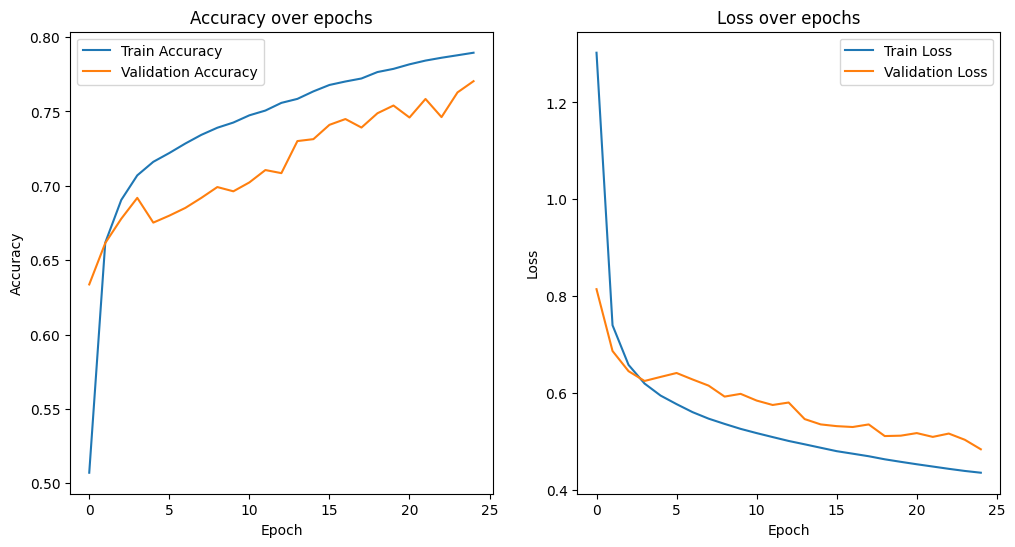

In [196]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt

# Sample dataset (replace with your actual dataset)
# sampled_df = pd.read_csv('path_to_your_sampled_df.csv')
np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)

# Encode combined clusters as integers
label_encoder = LabelEncoder()
sampled_df['combined_cluster_encoded'] = label_encoder.fit_transform(sampled_df['combined_cluster'])

# Extract features and labels
X = sampled_df[genre_columns + ['age', 'sex', 'occupation']]  # Features
y = sampled_df['combined_cluster_encoded']  # Labels

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Reshape data for CNN: Treat each sample as a "1D image"
X_reshaped = X_normalized.reshape(X_normalized.shape[0], X_normalized.shape[1], 1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


##  Performance of RS - Kmeans+CNN

In [197]:
# Function to recommend movies based on combined cluster
np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)

def recommend_movies(user_id, n_recommendations=5):
    # Get the combined cluster for the given user
    user_cluster = sampled_df[sampled_df['user_id'] == user_id]['combined_cluster'].values[0]

    # Filter movies watched by users in the same cluster
    similar_users = sampled_df[sampled_df['combined_cluster'] == user_cluster]['user_id'].unique()
    similar_user_movies = sampled_df[sampled_df['user_id'].isin(similar_users)]

    # Recommend top-rated movies in the cluster
    top_movies = similar_user_movies.groupby('movie_id')['rating'].mean().sort_values(ascending=False).head(n_recommendations)

    # Fetch movie titles
    recommended_movies = sampled_df[sampled_df['movie_id'].isin(top_movies.index)]['movie title'].unique()

    return recommended_movies


Recommended movies for user 305: ['Brothers McMullen, The (1995)' 'Down by Law (1986)'
 'Manchurian Candidate, The (1962)' 'Crooklyn (1994)' 'Hard Eight (1996)']


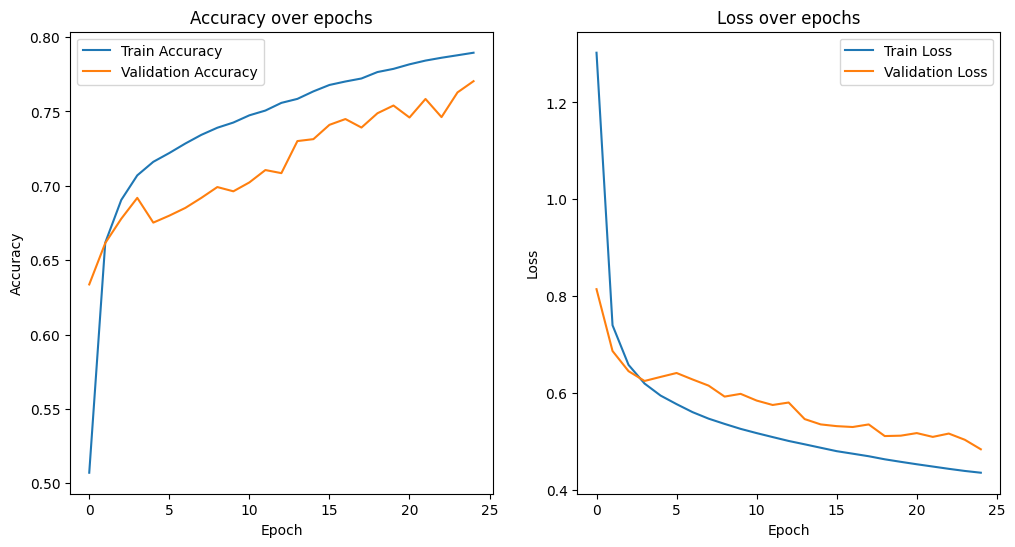

In [198]:
# Example: Recommend movies for a user
np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)

user_id = 305  # Replace with a user ID
recommended_movies = recommend_movies(user_id)
print(f"Recommended movies for user {user_id}: {recommended_movies}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [200]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from math import sqrt
import os
import random

# Ensure deterministic results
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Set TensorFlow for deterministic operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Prepare data as per the previous setup (demographic and genre clustering)
# Assume `sampled_df`, `genre_columns`, and `label_encoder` are already defined
# Create feature set
X = sampled_df[genre_columns + ['age', 'sex', 'occupation']]  # Features
y = sampled_df['combined_cluster_encoded']  # Labels

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_reshaped = X_normalized.reshape(X_normalized.shape[0], X_normalized.shape[1], 1)

# Train/test split (fix shuffle to ensure consistent split)
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42, shuffle=False)

# Define CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model (ensure dropout is disabled)
model.trainable = False  # Freeze the model to avoid dropout during evaluation
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')




Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3972 - loss: 1.8184 - val_accuracy: 0.6092 - val_loss: 0.8303
Epoch 2/25
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6478 - loss: 0.7731 - val_accuracy: 0.6654 - val_loss: 0.7065
Epoch 3/25
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6821 - loss: 0.6780 - val_accuracy: 0.6921 - val_loss: 0.6601
Epoch 4/25
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7015 - loss: 0.6317 - val_accuracy: 0.7101 - val_loss: 0.6301
Epoch 5/25
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7160 - loss: 0.6006 - val_accuracy: 0.7160 - val_loss: 0.6053
Epoch 6/25
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7264 - loss: 0.5775 - val_accuracy: 0.7155 - val_loss: 0.5854
Epoch 7/25
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7373 - loss: 0.5569 - val_accuracy: 0.7184 - val_loss: 0.5729
Epoch 8/25
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7421 - loss: 0.5408 - val_accurac